This capstone project started with the capstone ideas submission, through the prototyping phases, the model comparison, refactoring, to system deployment. The following briefly describes each step:

# 1. Capstone ideas and [proposal](https://github.com/yungnien/Springboard/blob/master/capstone/Capstone%20Proposal.ipynb):
In the beginning,  three project proposals were required, via searching for possible data sets, several [possible data sources were identified](https://github.com/yungnien/Springboard/blob/master/capstone/Capstone%20ideas.ipynb), and later narrow down to [three candidate topics](https://github.com/yungnien/Springboard/blob/master/capstone/Capstone%20ideas%20v2.ipynb). The mentor recommends selecting NLP project based on popularity and resource constrain as image processing will require significant computation resources that might not be available for free. The proposal was submitted and been approved. 


# 2. [Prototyping](https://github.com/yungnien/Springboard/tree/master/capstone/prototype):
Following the progress of the curriculum, different data cleaning, and modeling approach been applied
* [Data Wrangling](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Data%20Wrangling.ipynb):   
Although the primary data is question sentences that do not require feature engineering,  the basic data cleaning step has been applied and tested, including removing accented & foreign characters, expanding contractions, case unification, stemming, lemmatization and stop word removing.  The latter three did not been applied to the final modeling comparison for data consistency reason. 

* [Imbalance Treatment](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Prototype-Imbalance.ipynb):   
As only 10% of question sentences been labeled insincere,  several data augmentation attempts been tested. Unfortunately, the results show oversampling, under-sampling, nor SMOTE can significantly improve the accuracy of a simple regulation model.  

* Machine Learning Modeling [1](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Prototype.ipynb) and [2](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Prototype-Sklearn.ipynb) :   
Using scikit-learn package, several machine learning modelings have been tested along with hyperparameter optimization.  scikit-learn also has MLP capability in which also the model been tested here.   The test results show similar performance among the gradient boosting, and logistic regression for this question besides the MLP model. 

* [Deep Learning Modeling](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Prototype-keras.ipynb):   
Different deep learning modelings have been tested in this section in which all of the deep learning models have to compare with the traditional machine learning approach. The RNN is the one been selected to carry on to the next step.  

* [Transfer Learning Modeling](https://github.com/yungnien/Springboard/blob/master/capstone/prototype/Prototype_tansfer.ipynb):   
Two major transfer learning approaches word embedding and prebuilt language modeling have also been tried out here. They provided much better performance-boosting among other available options (data manipulation,  modeling selection, and hyperparameter)

# 3. [Model comparison](https://github.com/yungnien/Springboard/blob/master/capstone/Capstone.ipynb) 

As proposed, both ML and DL models will be compared in a similar setup. Based on the experience on the prototyping phase with the consideration in training time, resource requirement and model accuracy, the following models been pooled together to compare the result. 

* Traditional Machine Learning:
    - Bag-Of-Word (BOW) Logistic Regression (TF-IDF)
    - Word2Vec Logistic Regression
    - Pre-Trained Word2Vec Logistic Regression (GoogleNews-vectors-negative300)
    - Doc2Vec Logistic Regression

* Deep Learning :
    - RNN with Embedding Layer
    - RNN with Pre_trained Embedding layer
    - Language Models (Flair)
    - Language Models (Universal Sentence Encoder)
    - Language Models (ULMFiT)

The comparison result shows RNN with embedding (pre-trained word-vector embedding or newly trained embedding) models have better accuracy, following by the transfer learning using pre-trained language models. The logistical regression models (with word embedding, doc embedding or TF-IDF) positioned in the tail lags.

# 4. Refactoring and deployment 

Followed the instruction in curriculum 17.1, three models (one logistical regression, one RNN with word embedding and one pre-trained language model) were [refactored](https://github.com/yungnien/production/blob/master/exploration/capstone/ReFactory.ipynb ) and the [production branch](https://github.com/yungnien/production) was created.

The latter decision was to deploy one model using AWS Sagemaker. To use AWS Infrastructure, the container need to be resident in the AWS domain and use SageMaker endpoint, lambda service, and API Gateway as shown below. 

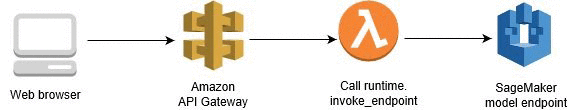


When the endpoint is enabled, the API Gateway https://kop1zl36lk.execute-api.us-east-2.amazonaws.com/cat/cat  can be accessed via a POST request with a JSON  body contains "question".  The following are the sample requests using curl commend:

<blockquote>
curl https://kop1zl36lk.execute-api.us-east-2.amazonaws.com/cat/cat -X POST -H "Content-Type: application/json"  -d '{"question": "Was there any relationship between Napoleon and Ali Pasha of Tepelene?"}'
<BR>
    
* the above return class 0 (sincere) with probabiloty 0.99 {"statusCode": 200, "body": "{\"class\": 0, \"prob\": 0.9995133876800537}"}

curl https://kop1zl36lk.execute-api.us-east-2.amazonaws.com/cat/cat -X POST -H "Content-Type: application/json"  -d '{"question": "Why do the Liberals who run schools choose not to have controlled access? The kids in Florida were killed due to an unlocked door."}'
<BR>
* the above return class 1 (insincere) with probabiloty 0.99 {"statusCode": 200, "body": "{\"class\": 0, \"prob\": 0.9995133876800537}"}
</blockquote>

The -X, -H and -d are the curl command's parameters for request, header, and data respectively.